In [45]:
# Conexão com o drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [48]:
# Carrega a biblioteca pandas e atribui um alias chamado "pd"
import pandas as pd

# Visualização de dados
import matplotlib.pyplot as plt
import seaborn as sns

# Deixar colunas e linhas aparentes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [49]:
#Faz a leitura do arquivo igm_modificado.csv - alterar o caminho de onde está dua tabela
df = pd.read_csv('/content/drive/MyDrive/igm_modificado - igm_modificado.csv')
df.shape

(5570, 32)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5570 entries, 0 to 5569
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   regiao                       5570 non-null   object 
 1   estado                       5570 non-null   object 
 2   municipio                    5570 non-null   object 
 3   codigo_mun                   5570 non-null   int64  
 4   capital                      5570 non-null   int64  
 5   porte                        5570 non-null   object 
 6   populacao                    5570 non-null   object 
 7   area                         5570 non-null   object 
 8   densidade_dem                5566 non-null   object 
 9   pib                          5570 non-null   float64
 10  pib_pc                       5570 non-null   float64
 11  participacao_transf_receita  4893 non-null   float64
 12  servidores                   5233 non-null   float64
 13  comissionados     

In [51]:
# Verificar se há dados faltantes em cada coluna
dados_faltantes = df.isnull().sum()

# Exibir as colunas com dados faltantes e a contagem de valores ausentes em cada uma
print("Dados faltantes por coluna:")
print(dados_faltantes)

Dados faltantes por coluna:
regiao                            0
estado                            0
municipio                         0
codigo_mun                        0
capital                           0
porte                             0
populacao                         0
area                              0
densidade_dem                     4
pib                               0
pib_pc                            0
participacao_transf_receita     677
servidores                      337
comissionados                     0
comissionados_por_servidor        0
perc_pop_econ_ativa               5
taxa_empreendedorismo             0
anos_estudo_empreendedor          0
jornada_trabalho                  0
gasto_pc_saude                  689
hab_p_medico                    619
exp_vida                          5
gasto_pc_educacao               690
exp_anos_estudo                   5
nota_ciencias                    12
nota_humanas                     12
nota_linguagem                   13


In [54]:
# Preencher os valores faltantes da variável participacao_transf_receita com a média
df['participacao_transf_receita'] = df['participacao_transf_receita'].fillna(df['participacao_transf_receita'].mean())

In [64]:
# Verificar se há dados faltantes em cada coluna
dados_faltantes = df.isnull().sum()

# Exibir as colunas com dados faltantes e a contagem de valores ausentes em cada uma
print("Dados faltantes por coluna:")
print(dados_faltantes)

Dados faltantes por coluna:
regiao                            0
estado                            0
municipio                         0
codigo_mun                        0
capital                           0
porte                             0
populacao                         0
area                              0
densidade_dem                     4
pib                               0
pib_pc                            0
participacao_transf_receita       0
servidores                        0
comissionados                     0
comissionados_por_servidor        0
perc_pop_econ_ativa               0
taxa_empreendedorismo             0
anos_estudo_empreendedor          0
jornada_trabalho                  0
gasto_pc_saude                    0
hab_p_medico                    619
exp_vida                          0
gasto_pc_educacao                 0
exp_anos_estudo                   0
nota_ciencias                    12
nota_humanas                     12
nota_linguagem                   13


In [65]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Selecionar as variáveis de interesse
X = df['participacao_transf_receita']  # Variável independente (participacao_transf_receita)
y = df['pib']  # Variável dependente (PIB)

# Adicionar uma constante à variável independente para estimar o intercepto
X = sm.add_constant(X)

# Ajustar o modelo de regressão linear
modelo = sm.OLS(y, X).fit()

# Mostrar os resultados da regressão
print(modelo.summary())

# Escrever a equação final do modelo
intercepto = modelo.params['const']
coeficiente_participacao_transf_receita = modelo.params['participacao_transf_receita']
equacao_modelo = f"PIB = {intercepto:.2f} + {coeficiente_participacao_transf_receita:.2f} * participacao_transf_receita"
print("Equação do modelo:", equacao_modelo)

                            OLS Regression Results                            
Dep. Variable:                    pib   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.055
Method:                 Least Squares   F-statistic:                     323.0
Date:                Thu, 09 May 2024   Prob (F-statistic):           2.95e-70
Time:                        22:35:19   Log-Likelihood:                -97240.
No. Observations:                5570   AIC:                         1.945e+05
Df Residuals:                    5568   BIC:                         1.945e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

**A:** Fazendo a analise exploratória, notamos que a participação das transferencias de receitas tem relação com o pib e por isso optamos em escolhe-la para a regressão linear simples!


**B:** Coeficiente: -2.106e+05
p-valor < 0.001

R2: 0.055


**C:** PIB = 18292692.40 − 210628.45 * participacao_transf_receita


**D:** Verificamos que o valor baixo de R2 nos mostra que uma pequena parte da variabilidade do pib é explicada pela variavel participacao_transf_receita. Porém o valor negativo de seu coeficiente e seu p-valor < 0.001, mostra que é uma variavel estatisticamente significativa e o aumento na participação na transferência de receitas está associado a uma diminuição no PIB. Também é possível que exista uma dependência de recursos transferidos, que podem não estar sendo utilizados de maneira correta e eficiente para o desenvolvimento econômico.


In [66]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Preencher valores faltantes, se houver
df['participacao_transf_receita'].fillna(df['participacao_transf_receita'].mean(), inplace=True)
df['capital'].fillna(df['capital'].mean(), inplace=True)
df['comissionados'].fillna(df['comissionados'].mean(), inplace=True)

# Selecionar as variáveis independentes e dependente
X = df[['participacao_transf_receita', 'capital', 'comissionados']]
y = df['pib']

# Adicionar uma constante à matriz X
X = sm.add_constant(X)

# Ajustar o modelo de regressão linear múltipla
modelo = sm.OLS(y, X).fit()

# Mostrar os resultados da regressão
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                    pib   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     1431.
Date:                Thu, 09 May 2024   Prob (F-statistic):               0.00
Time:                        22:35:38   Log-Likelihood:                -95805.
No. Observations:                5570   AIC:                         1.916e+05
Df Residuals:                    5566   BIC:                         1.916e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

**A:** Escolhemos as variaveis: participacao_transf_receita, capital, comissionados, para previsão do pib na regressão linear multipla, pois através da análise exploratória percebemos que elas possuem uma relação forte com o pib.

**B:** Coeficientes:
Participação Transf. Receita	-4.521e+04
p-valor < 0.001

Capital	3.01e+07
p-valor < 0.001

Comissionados	2.068e+04
p-valor < 0.001

R2: 0.435

**C:** Equação do modelo: PIB = 2.537e+06 - 4.521e+04 * Participação Transf. Receita + 3.01e+07 * Capital + 2.068e+04 * Comissionados

**D:** Todas as variáveis independentes são estatisticamente significativas, o valor P < 0.001, mostra que tem impacto no pib. Também o valor de R2 43.5% nos mostra que é um valor consideravel para ser observado no pib.

O coeficiente negativo da variavel participacao_transf_receita, está ligado a diminuição no pib, nos levando a crer que dependendo da situação e da dependencia de transferências de recursos pode acarretar no prejuizo economico da região.

Já o coeficiente da capital é positivo e está ligado ao aumento no pib. Acaba sendo esperado pois, existe um investimento e desenvolvimento econômico grande nas capitais.

Comissionados também tem valor positivo no pib, o que pode explicar que administração pública ativa, pode ter efeitos positivos no crescimento econômico.

Random Forest Metrics:
Mean Squared Error (MSE): 43818797214973.875
Mean Absolute Error (MAE): 1027595.949852277
R-squared (R²): 0.4976030677933514

XGBoost Metrics:
Mean Squared Error (MSE): 20677234204211.52
Mean Absolute Error (MAE): 836877.5386189268
R-squared (R²): 0.76292870432408


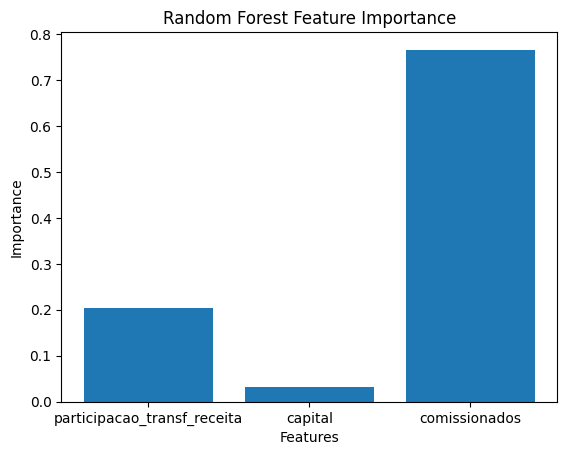

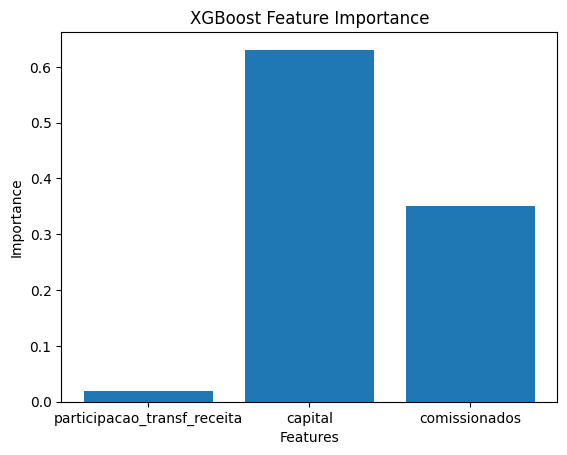

In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Selecionar apenas as colunas numéricas
numeric_cols = df.select_dtypes(include=np.number)

# Preencher valores faltantes nas colunas numéricas usando as médias
df[numeric_cols.columns] = numeric_cols.fillna(numeric_cols.mean())


# Selecionar as variáveis independentes e dependente
X = df[['participacao_transf_receita', 'capital', 'comissionados']]
y = df['pib']

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar o modelo Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Avaliar o modelo Random Forest
rf_predictions = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)

print("Random Forest Metrics:")
print("Mean Squared Error (MSE):", rf_mse)
print("Mean Absolute Error (MAE):", rf_mae)
print("R-squared (R²):", rf_r2)

# Treinar o modelo XGBoost
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Avaliar o modelo XGBoost
xgb_predictions = xgb_model.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_predictions)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)
xgb_r2 = r2_score(y_test, xgb_predictions)

print("\nXGBoost Metrics:")
print("Mean Squared Error (MSE):", xgb_mse)
print("Mean Absolute Error (MAE):", xgb_mae)
print("R-squared (R²):", xgb_r2)

# Plotar a importância das variáveis para o modelo Random Forest
plt.bar(X.columns, rf_model.feature_importances_)
plt.title('Random Forest Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# Plotar a importância das variáveis para o modelo XGBoost
plt.bar(X.columns, xgb_model.feature_importances_)
plt.title('XGBoost Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

**A:** Foram escolidas as variaveis: participacao_transf_receita, capital e comissionados, com base no potencial e importancia na variabilidade do pib. A participacao_transf_receita pode nos mostrar transferências de receita no PIB, a capital pode nos mostrar o investimento e o desenvolvimento economico, e comissionados pode ser uma medida do emprego de funcionários públicos.

**B:** Mean Squared Error (MSE): Pois é nos apresenta a qualidade das previsões do modelo, tendo em vista que o MSE mais baixo inidica previsões mais precisas.

Mean Absolute Error (MAE): Nos mostra a precisão das previsões do modelo, ele é menos sensível a outliers e nos da uma ideia dos erros absolutos médios das previsões.

R-squared (R2): Acaba nos mostrando a proporção da variabilidade na variavel dependente e como é explicada pelas variáveis independentes no modelo. Quanto maior o R2, nos mostra que os dados se ajustam melhor no modelo.

**C:** No modelo Random Forest a variavel mais importante é: comissionados, seguido de participacao_transf_receita e depois capital.

No modelo XGBoost a variavel mais importante é: capital, seguido de comissionados e depois participacao_transf_receita.

**D:** Analisamos os resultados e com base no que nos é apresentado através do R2 do Random Forest 0.4976 e no R2 do XGBoost 0.7629, percebos que existe uma melhor variabilidade no pib em ambos os modelos, se comparado com o modelo OLS Também nos explica melhor sobre a qualidade das previsões, a precisão  na previsão do modelo e a proporção da variabilidade das variaveis.

In [68]:
#Questão 4:

**4:** Random Forest Metrics:
Mean Squared Error (MSE): 43818797214973.875
Mean Absolute Error (MAE): 1027595.949852277
R-squared (R²): 0.4976030677933514

XGBoost Metrics:
Mean Squared Error (MSE): 20677234204211.52
Mean Absolute Error (MAE): 836877.5386189268
R-squared (R²): 0.76292870432408

Comparando o resultado dos 2 modelos, percebemos que o R2 do XGBoost é maior que o do Random Forest, porque nos mostra que nesse modelo possui mais variabilidade dos dados e acaba se ajustando melhor. Também nos mostra que os valores de MSE e o MAE do XGBoot são menores em comparação ao Random Forest, o que explica que é melhor para a previsão do pib.

Portanto o modelo XGBoost é melhor!